# Import the packages

In [1]:
import pipeline as pi
from tifffile import imread,imwrite
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time

# Preprocessing

## Steps:
    
    - Increase the contrast of the image 
    - Segmenting the algae plane per plane
    - Removing them from background

In [2]:
start = time.time()

In [3]:
preprocessed,alg_mask = pi.preprocessing('../data/tricho_wound.tif')

Increasing the contrast...
--------------------------------------------------------------
Done with the contrast!
--------------------------------------------------------------
Segmenting the algae...
--------------------------------------------------------------
0.00 % done ...
0.10 % done ...
0.19 % done ...
0.29 % done ...
0.38 % done ...
0.48 % done ...
0.58 % done ...
0.67 % done ...
0.77 % done ...
0.87 % done ...
0.96 % done ...
1.06 % done ...
1.15 % done ...
1.25 % done ...
1.35 % done ...
1.44 % done ...
1.54 % done ...
1.64 % done ...
1.73 % done ...
1.83 % done ...
1.92 % done ...
2.02 % done ...
2.12 % done ...
2.21 % done ...
2.31 % done ...
2.41 % done ...
2.50 % done ...
2.60 % done ...
2.69 % done ...
2.79 % done ...
2.89 % done ...
2.98 % done ...
3.08 % done ...
3.18 % done ...
3.27 % done ...
3.37 % done ...
3.46 % done ...
3.56 % done ...
3.66 % done ...
3.75 % done ...
3.85 % done ...
3.95 % done ...
4.04 % done ...
4.14 % done ...
4.23 % done ...
4.33 % done ...


45.81 % done ...
45.91 % done ...
46.01 % done ...
46.10 % done ...
46.20 % done ...
46.29 % done ...
46.39 % done ...
46.49 % done ...
46.58 % done ...
46.68 % done ...
46.78 % done ...
46.87 % done ...
46.97 % done ...
47.06 % done ...
47.16 % done ...
47.26 % done ...
47.35 % done ...
47.45 % done ...
47.55 % done ...
47.64 % done ...
47.74 % done ...
47.83 % done ...
47.93 % done ...
48.03 % done ...
48.12 % done ...
48.22 % done ...
48.32 % done ...
48.41 % done ...
48.51 % done ...
48.60 % done ...
48.70 % done ...
48.80 % done ...
48.89 % done ...
48.99 % done ...
49.09 % done ...
49.18 % done ...
49.28 % done ...
49.37 % done ...
49.47 % done ...
49.57 % done ...
49.66 % done ...
49.76 % done ...
49.86 % done ...
49.95 % done ...
50.05 % done ...
50.14 % done ...
50.24 % done ...
50.34 % done ...
50.43 % done ...
50.53 % done ...
50.63 % done ...
50.72 % done ...
50.82 % done ...
50.91 % done ...
51.01 % done ...
51.11 % done ...
51.20 % done ...
51.30 % done ...
51.40 % done .

92.40 % done ...
92.49 % done ...
92.59 % done ...
92.69 % done ...
92.78 % done ...
92.88 % done ...
92.97 % done ...
93.07 % done ...
93.17 % done ...
93.26 % done ...
93.36 % done ...
93.46 % done ...
93.55 % done ...
93.65 % done ...
93.74 % done ...
93.84 % done ...
93.94 % done ...
94.03 % done ...
94.13 % done ...
94.23 % done ...
94.32 % done ...
94.42 % done ...
94.51 % done ...
94.61 % done ...
94.71 % done ...
94.80 % done ...
94.90 % done ...
95.00 % done ...
95.09 % done ...
95.19 % done ...
95.28 % done ...
95.38 % done ...
95.48 % done ...
95.57 % done ...
95.67 % done ...
95.77 % done ...
95.86 % done ...
95.96 % done ...
96.05 % done ...
96.15 % done ...
96.25 % done ...
96.34 % done ...
96.44 % done ...
96.54 % done ...
96.63 % done ...
96.73 % done ...
96.82 % done ...
96.92 % done ...
97.02 % done ...
97.11 % done ...
97.21 % done ...
97.31 % done ...
97.40 % done ...
97.50 % done ...
97.59 % done ...
97.69 % done ...
97.79 % done ...
97.88 % done ...
97.98 % done .

In [45]:
def dist(df_t,df_t1,points):
    '''
    Function to compute te difference in coordinate between 2 points

    Parameters
    ----------
    df_t : dataframe
        position of te algae at frame t.
    df_t1 : dataframe
        position of te algae at time t plus 1.
    points : list
        the position in the dataframe where to compute the distance.

    Returns
    -------
    dx,dy: int 
        Te difference in x and y between the 2 points.

    '''
    one = df_t.iloc[points[0]]
    two = df_t1.iloc[points[1]]

    dx = (two['centroid-1']-one['centroid-1'])
    dy = (two['centroid-0']-one['centroid-0'])
    
    return dx,dy 


def rmse(imt,imt1,df_t,df_t1,points, max_p: int = 255) -> float:
    """
    
    Root Mean Squared Error
    
    """
    
    mx = round(np.min(df_t.x.values))
    my = round(np.min(df_t.y.values))
    
    cx = round(df_t.iloc[points[0]]['centroid-0'])
    cy = round(df_t.iloc[points[0]]['centroid-1'])

    cx2 = round(df_t1.iloc[points[1]]['centroid-0'])
    cy2 = round(df_t1.iloc[points[1]]['centroid-1'])
    
    org_img = imt[int(cx-(mx/2)):int(cx+(mx/2)),int(cy-(my/2)):int(cy+(my/2))]
    pred_img = imt1[int(cx2-(mx/2)):int(cx2+(mx/2)),int(cy2-(my/2)):int(cy2+(my/2))]
    
    return org_img,pred_img
    '''
    if np.shape(org_img) != np.shape(pred_img):
        print(points)
        squared_diff = 1000
    else: 
        squared_diff = ((org_img - pred_img)/max_p)**2

    return np.sqrt(np.mean(squared_diff))
    '''

def drift(imt,imt1,df_t,df_t1,method = 'linear',thresh=50):
    '''
    Parameters
    ----------
    df_t : dataframe
        position of te algae at frame t.
    df_t1 : dataframe
        position of te algae at time t plus 1.
    method : string, optional
        method to compute te best assignment. The default is 'linear sum'.
    thresh: int, optional
        Threshold to consider 2 points not possible to be the same between time t and t +1
    Returns
    -------
    distnace: list
        the distances between all the assigned point from frame t and t plus 1.

    Workflow:
    --------
    
    Function to compute the drift between 2 time points.
        - Create the distance matrix i.e. the "distance" between every point
        - perform linear sum assignment on this matrix
        - extract the best assignment and compute the 'optimal distance' between the assigned points 
        
    '''
    #Initialize the cost matrix
    m = []
    
    row = df_t.index.values
    col = df_t1.index.values
    
    # put mx and my 
    new_col, new_row = [], []
    
    for t in row:
        for t_1 in col:
            d = rmse(imt,imt1,df_t,df_t1,[t,t_1])#note that here the order of the arguments in the dist function matters 
            if d > thresh:
                d = 1000000 #if the distance is above a certain threshold make it so that it is very large
                #to avoid pairing
            m.append(d)
    #reshape the matrix (might be a more efficient way to create it)
    
    m = np.asarray(m).reshape((len(row),len(col)))
    
    if method.lower() == 'linear':
        
        # Perform linear sum assignment

        row_ind, col_ind = linear_sum_assignment(m)
        
    elif method.lower() == 'bipartite':
        
        biadjacency_matrix = csr_matrix(m)
        
        row_ind,col_ind = min_weight_full_bipartite_matching(biadjacency_matrix)
   
    else:
        return 'Please input a valid method'
    
    # Initialize the optimal distance list
    
    distance = []
    
    # Besed on the result of the linear assignment compute it
    
    for i,j in zip(row_ind,col_ind):
        distance.append(dist(df_t,df_t1,[row[i],col[j]]))
        
    return row_ind,col_ind,distance

In [46]:
from skimage.measure import label, regionprops_table
from scipy.optimize import linear_sum_assignment 

test = imread('../data/tricho_wound_alg_only_otsu.tif')
test_i = imread('../data/tricho_wound.tif')
im = test.copy()

plane = 731

t = im[plane,...]
t1 = im[plane+1,...]

t_i = test_i[plane,...]
t_i1 = test_i[plane+1,...]

lab = label(t)
props = regionprops_table(label_image=lab, properties=('centroid','area','bbox'))
df_t = pd.DataFrame(props)

# Filter the results to have plausible algae 
# Here I am assuming that a "real algae" needs to have an area moe than 10 pixels² and less than 300

df_t = df_t[df_t.area < 300].reset_index() #reset index to avoid having gaps in index value 
                                        #(it is used in the dist function)
df_t = df_t[df_t.area > 10].reset_index()

lab = label(t1)
props = regionprops_table(label_image=lab, properties=('centroid','area','bbox'))
df_t1 = pd.DataFrame(props) 
df_t1 = df_t1[df_t1.area < 300].reset_index()
df_t1 = df_t1[df_t1.area > 10].reset_index()


df_t.insert(0,'x',[np.abs(df_t.iloc[x]['bbox-0'] - df_t.iloc[x]['bbox-1']) for x in  df_t.index.values])
df_t.insert(0,'y',[np.abs(df_t.iloc[x]['bbox-2'] - df_t.iloc[x]['bbox-3']) for x in  df_t.index.values])
df_t1.insert(0,'x',[np.abs(df_t1.iloc[x]['bbox-0'] - df_t1.iloc[x]['bbox-1']) for x in  df_t1.index.values])
df_t1.insert(0,'y',[np.abs(df_t1.iloc[x]['bbox-2'] - df_t1.iloc[x]['bbox-3']) for x in  df_t1.index.values])

Compute a mean bbox to take the algae,steps:
- Find the bbox of the segmented objects
- find the size in the 2 directions
- take the average size
- create a bbox that is centroid-(1/2 size bbox):centroid+(1/2 size bbox) *2

In [41]:
df_bbox = df_t1.copy()

#df_bbox.insert(0,'x',[np.abs(df_bbox.iloc[x]['bbox-0'] - df_bbox.iloc[x]['bbox-1']) for x in  df_bbox.index.values])
#df_bbox.insert(0,'y',[np.abs(df_bbox.iloc[x]['bbox-2'] - df_bbox.iloc[x]['bbox-3']) for x in  df_bbox.index.values])

#mx = round(np.min(df_bbox.x.values)) #take the min to be sure to slice the image and not have bigger bbox than the image
#my = round(np.min(df_bbox.y.values))

cx = round(df_bbox.iloc[i]['centroid-0'])
cy = round(df_bbox.iloc[i]['centroid-1'])


i = 18
print(int(cx-(mx/2)),int(cx+(mx/2)),int(cy-(my/2)),int(cy+(my/2)))
print(t_i[int(cx-(mx/2)):int(cx+(mx/2)),int(cy-(my/2)):int(cy+(my/2))].shape)
print(t[int(cx-(mx/2)):int(cx+(mx/2)),int(cy-(my/2)):int(cy+(my/2))].shape)
'''
plt.imshow(t_i[int(cx-(mx/2)):int(cx+(mx/2)),int(cy-(my/2)):int(cy+(my/2))])
plt.show()
plt.imshow(t_i1[int(cx-(mx/2)):int(cx+(mx/2)),int(cy-(my/2)):int(cy+(my/2))])
plt.show()
'''

IndexError: single positional indexer is out-of-bounds

In [47]:
e = drift(t_i,t_i1,df_t,df_t1)

[0, 18]
[1, 18]
[2, 18]
[3, 18]
[4, 18]
[5, 18]
[6, 18]
[7, 18]
[8, 18]
[9, 18]
[10, 18]
[11, 18]
[12, 18]
[13, 18]
[14, 18]
[15, 18]
[16, 18]
[17, 18]
[18, 18]
[19, 18]
[20, 0]
[20, 1]
[20, 2]
[20, 3]
[20, 4]
[20, 5]
[20, 6]
[20, 7]
[20, 8]
[20, 9]
[20, 10]
[20, 11]
[20, 12]
[20, 13]
[20, 14]
[20, 15]
[20, 16]
[20, 17]


In [35]:
row = df_t.index.values
col = df_t1.index.values

In [36]:
df_t['match'] = [x for x in np.zeros(len(df_t.index),dtype=int)]
for i,j in zip(e[0],e[1]):
    df_t['match'].iloc[i] = j 
    
df_t.head()

C:\Users\nessl\AppData\Local\Temp\ipykernel_21120\2840328333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['match'].iloc[i] = j


,y,x,level_0,index,centroid-0,centroid-1,area,bbox-0,bbox-1,bbox-2,bbox-3,match
0,77.0,78.0,2,2,46.000000,123.500000,16,44,122,49,126,0
1,23.0,20.0,5,5,51.380952,29.095238,21,48,28,55,32,13
2,42.0,37.0,6,6,54.790698,14.953488,43,50,13,60,18,10
3,7.0,8.0,8,8,97.818182,105.696970,33,95,103,102,109,0
4,93.0,91.0,10,11,108.083333,200.166667,12,107,198,110,203,1


In [37]:
df_t = df_t[df_t.match != 0]
df_t1['index'] = [x for x in range(len(df_t1.index.values))]
df_t1

,y,x,level_0,index,centroid-0,centroid-1,area,bbox-0,bbox-1,bbox-2,bbox-3
0,544.0,545.0,2,0,10.666667,555.533333,15,9,554,14,558
1,32.0,33.0,10,1,44.072727,11.927273,55,41,8,49,17
2,93.0,91.0,11,2,64.571429,156.085714,35,62,153,68,161
3,7.0,9.0,13,3,98.464789,106.619718,71,94,103,104,111
4,99.0,100.0,14,4,108.820225,207.039326,178,97,197,119,218
5,110.0,115.0,18,5,149.235294,261.500000,34,145,260,154,264
6,89.0,89.0,20,6,161.288889,250.200000,45,158,247,166,255
7,87.0,86.0,21,7,167.117647,80.588235,17,165,79,170,83
8,80.0,80.0,22,8,172.767442,252.744186,43,169,249,177,257
9,32.0,33.0,23,9,187.000000,219.666667,18,185,218,190,222


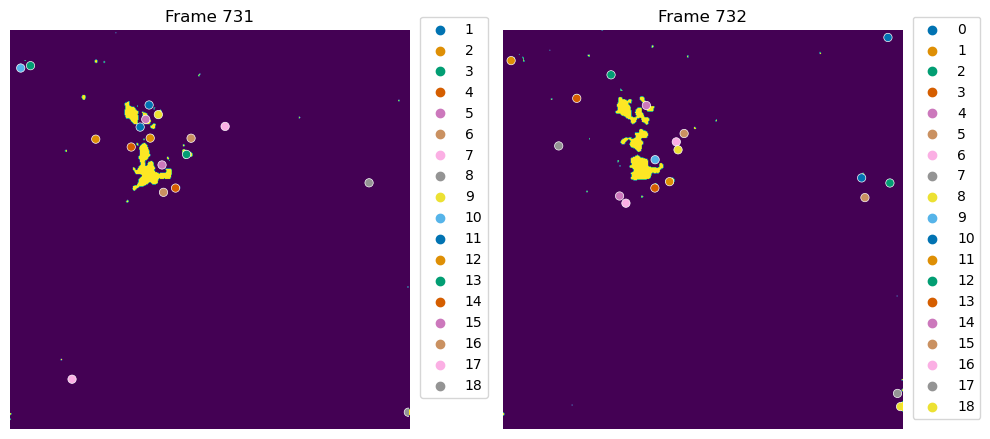

In [38]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(test[731,...])
sns.scatterplot(data=df_t,x='centroid-1',y='centroid-0',hue='match',palette='colorblind',ax=ax[0])
ax[0].legend(bbox_to_anchor=(1.01, 1.05))
ax[0].set_title('Frame 731')

ax[1].imshow(test[732,...])
sns.scatterplot(data=df_t1,x='centroid-1',y='centroid-0',hue='index',palette='colorblind',ax=ax[1])
ax[1].legend(bbox_to_anchor=(1.01, 1.05))
ax[1].set_title('Frame 732')


for ax in ax:
    ax.axis('off')
    
#fig.suptitle(f'Error = {df_e.Error.values[0]:.2f} pixels')
plt.tight_layout()
#plt.savefig('../data/results/figures/compare/full_pipeline/drift_error_visual.png',dpi=300)
plt.show()

In [190]:
x = []
y = []
for i,j in e[2]:
    x.append(i)
    y.append(j)
    

In [191]:
np.median(y)

19.039160839160843

In [192]:
np.median(x)

52.57751937984497

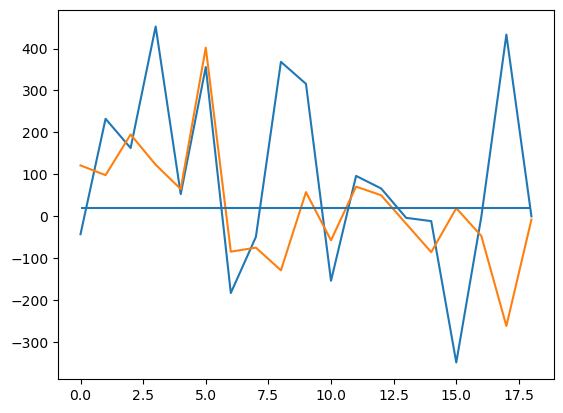

In [193]:
plt.plot(x)
plt.plot(y)
plt.hlines(np.median(y),0,18)

In [18]:
t = np.arange(10)
v = np.array([9,9,40,50])

if True in np.in1d(v,t):
    print('True')

True
